# Assignment: Week 2 - Goal search

## Overview

Complete this assignment by completing the steps below.  The assignment has two parts, the base portion that is required is worth 100 points, plus a bonus portion is worth 10 points.

1. Configure your environment

1. Study the algorithms and read the code

1. Run through the example exercises using the undirected graph of Romanian roads

1. Apply what you have learned to a map of Colorado roads

1. Answer the questions posed at the end of this document

1. Save your notebook as a PDF and submit it to the Assignments on Worldclass


## Getting Git
Throughout this course we will make use of the [aima-python project on Github](https://github.com/aimacode/aima-python).  This is an active opensource development effort with many contributors including atleast one of the text authors. 

To get the code you will need to get a copy of it.  This is commonly referred to as "cloning" a repository and you can find directions how to do it [here](https://help.github.com/articles/cloning-a-repository/).  Git is what is called version control software and is used to power the web-site GitHub.  You can interact with GitHub simply through your web browser, or by using client software.  I recommend sooner but the choice is up to you.  If you are using Linux or macOS, then you probably already have Git installed.  Enter `which git` at the command line, you will either see a path or `command not found`.  These lists of clients will provide you plenty of options to choose from:

* [Command-line clients](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
* [GUI clients](https://git-scm.com/downloads/guis)

**If you are new to Git -- that is awesome -- you will learn some Git basics that will help prepare you for working as a data scientist.  You do not need to know Git or anything but a novice user in this course.**   

## Cloing a Repository
To get a copy of all the code in the repository, you need to `clone` it.  This simply means "copy it" and allows you to interact with others in the development of open source software.  The aima-python repository can be found at [github.com/aimacode/aima-python](https://github.com/aimacode/aima-python).  To clone simply enter `git clone https://github.com/aimacode/aima-python` from the command line.  Git will create a `aima-python` folder in whatever directory you ran the command from.  If you are using a GUI, find clone and provide it with `https://github.com/aimacode/aima-python`.   Once the command runs you should have the code downloaded.  Don't worry, you can delete this folder and repeat the process again and again.  

## Plan B

Alternatively, Github allows you to download a zip file of the repository.  This method is easy, but you are missing out in learning an essential skill that is required of most working data scientists.

## Preparing Your Environment

To complete this assignment here are the steps you will need to complete: 

1. Download and copy this assignment into your repository

2. Start Jupyter and navigate to the repository

3. Start Jupyter in that directory 

## Managing Your Working Directory

 You will need to enter the directory where you the aima-python code.  _You will need to update the location of aima-python on your system._

In [7]:
# jupyter started here
%pwd

'/Users/rob/Documents/GitHub/ai-course/assignments'

In [8]:
# move to the aima-python directory on your system
%cd /Users/rob/Documents/GitHub/aima-python

/Users/rob/Documents/GitHub/aima-python


In [9]:
# You should now be in the repository
%pwd

'/Users/rob/Documents/GitHub/aima-python'

Note: aima-python is _not_ a python package which means that you cannot conda or pip install it.  That is why you need to be in the repository in order to make use of repositories' code.  

## Importing the Needed Packages

In [10]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [6]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

## Defining a Search Problem

Let's see how we define a Problem. Run the next cell to see how abstract class `Problem` is defined in the search module.

In [6]:
psource(Problem)

The `Problem` class has six methods.

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.


* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimise a value when we cannot do a goal test.

## The Node Class

Let's see how we define a Node. Run the next cell to see how abstract class `Node` is defined in the search module.

In [7]:
psource(Node)

The `Node` class has nine methods. The first is the `__init__` method.

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

The next 4 methods are specific `Node`-related functions.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

The remaining 4 methods override standards Python functionality for representing an object as a string, the less-than ($<$) operator, the equal-to ($=$) operator, and the `hash` function.

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

* `__hash__(self)` : This returns the hash of the state of current node.

## Solving Graph Problems

We will use the abstract class `Problem` to define our real **problem** named `GraphProblem`. You can see how we define `GraphProblem` by running the next cell.

In [8]:
psource(GraphProblem)

Have a look at our romania_map, which is an Undirected Graph containing a dict of nodes as keys and neighbors as values.

## Creating the Graph

We are going to be using search to find routes between locations on a map.  Our text has chosen Romania and we will follow that example for now so that you can compare the results you get here with those in the book.  With apologies to Romanians everywhere, I am shortening the town names to a single letter.  

Later you will be applying this knowledge to route finding between major American cities.  But before we can do any of that, we first need something to search, an acyclic graph does the job nicely.  

In [9]:
romania_map = UndirectedGraph(dict(
    A=dict(Z=75, S=140, T=118),
    B=dict(U=85, P=101, G=90, F=211),
    C=dict(D=120, R=146, P=138),
    D=dict(M=75),
    E=dict(H=86),
    F=dict(S=99),
    H=dict(U=98),
    I=dict(V=92, N=87),
    L=dict(T=111, M=70),
    O=dict(Z=71, S=151),
    P=dict(R=97),
    R=dict(S=80),
    U=dict(V=142)))

romania_map.locations = dict(
    A=(91, 492), B=(400, 327), C=(253, 288),
    D=(165, 299), E=(562, 293), F=(305, 449),
    G=(375, 270), H=(534, 350), I=(473, 506),
    L=(165, 379), M=(168, 339), N=(406, 537),
    O=(131, 571), P=(320, 368), R=(233, 410),
    S=(207, 457), T=(94, 410), U=(456, 350),
    V=(509, 444), Z=(108, 531))

It is pretty straightforward to understand this `romania_map`. The first node **A** has three neighbours named **Z**, **S**, **T**. Each of these nodes are 75, 140, 118 units apart from **A** respectively. And the same goes with other nodes.

And `romania_map.locations` contains the positions of each of the nodes. We will use the straight line distance (which is different from the one provided in `romania_map`) between two cities in algorithms like A\*-search and Recursive Best First Search.

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

Say we want to start exploring from **A** and try to find **B** in our romania_map. So, this is how we do it.

In [10]:
romania_problem = GraphProblem('A', 'B', romania_map)

### Visualizing the Graph

Let's have a visualization of Romania map [Figure 3.2] from the book and see how different searching algorithms perform / how frontier expands in each search algorithm for a simple problem named `romania_problem`.

Have a look at `romania_locations`. It is a dictionary defined in search module. We will use these location values to draw the romania graph using **networkx**.

In [11]:
romania_locations = romania_map.locations
print(romania_locations)

{'A': (91, 492), 'B': (400, 327), 'C': (253, 288), 'D': (165, 299), 'E': (562, 293), 'F': (305, 449), 'G': (375, 270), 'H': (534, 350), 'I': (473, 506), 'L': (165, 379), 'M': (168, 339), 'N': (406, 537), 'O': (131, 571), 'P': (320, 368), 'R': (233, 410), 'S': (207, 457), 'T': (94, 410), 'U': (456, 350), 'V': (509, 444), 'Z': (108, 531)}


Let's get started by initializing an empty graph. We will add nodes, place the nodes in their location as shown in the book, add edges to the graph.

In [12]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

We have completed building our graph based on romania_map and its locations. It's time to display it here in the notebook. This function `show_map(node_colors)` helps us do that. We will be calling this function later on to display the map at each and every interval step while searching, using variety of algorithms from the book.

We can simply call the function with node_colors dictionary object to display it.

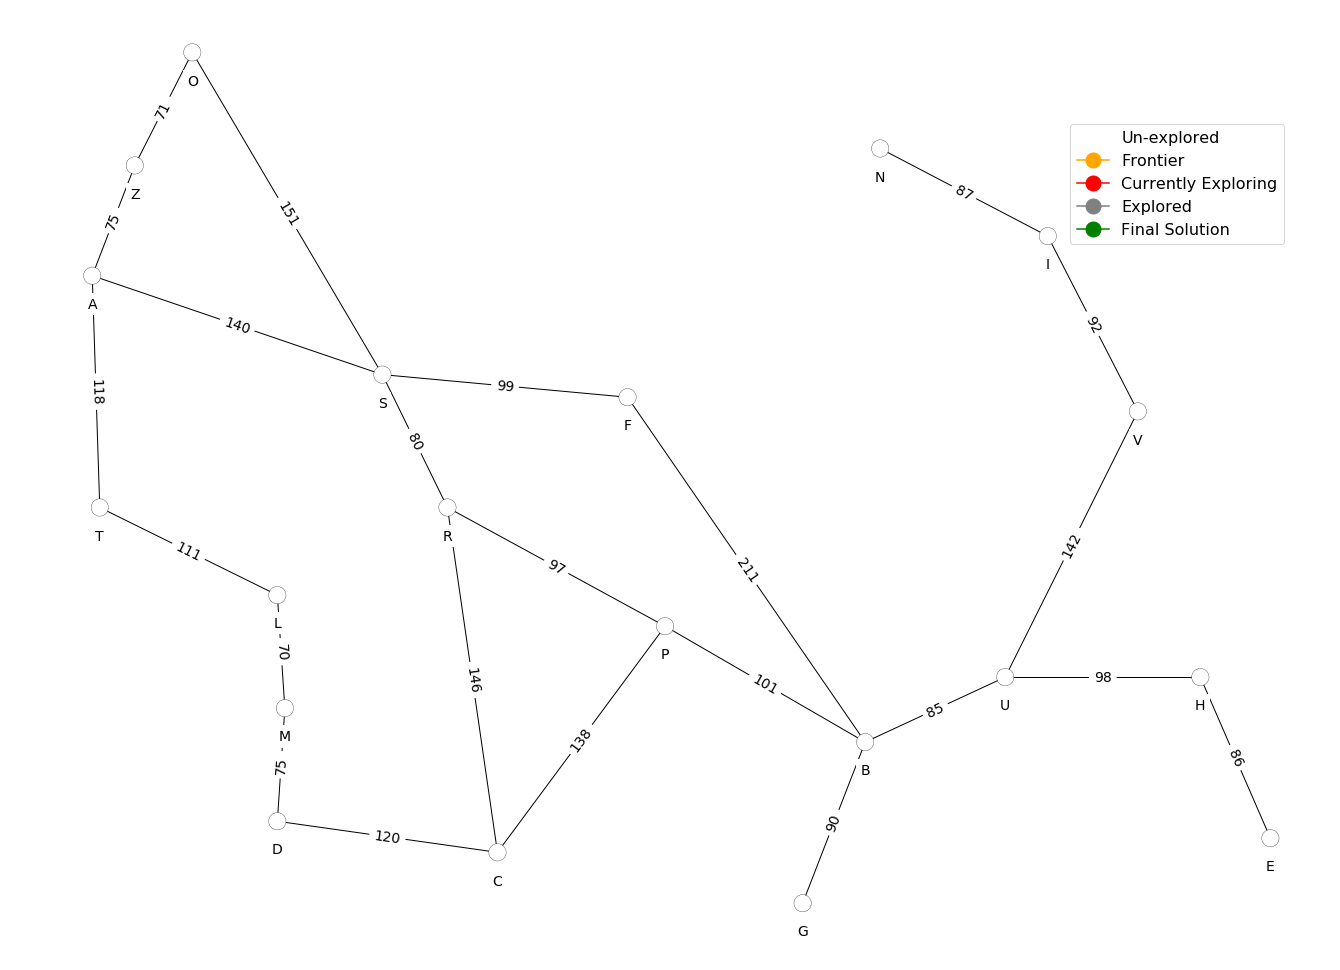

In [13]:
show_map(romania_graph_data)

Voila! You see, the romania map as shown in the Figure[3.2] in the book. Now, see how different searching algorithms perform with our problem statements.

It is pretty straightforward to understand this `romania_map`. The first node **A** has three neighbours named **Z**, **S**, **T**. Each of these nodes are 75, 140, 118 units apart from **A** respectively. And the same goes with other nodes.

And `romania_map.locations` contains the positions of each of the nodes. We will use the straight line distance (which is different from the one provided in `romania_map`) between two cities in algorithms like A\*-search and Recursive Best First Search.

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

Say we want to start exploring from **A** and try to find **B** in our romania_map. So, this is how we do it.

## Breadth-First-Search for Graphs

We have a working implementation in search module. But as we want to interact with the graph while it is searching, we need to modify the implementation. Here's the modified breadth first tree search.

In [14]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

Now, we use `ipywidgets` to display a slider, a button and our romania map. By sliding the slider we can have a look at all the intermediate steps of a particular search algorithm. By pressing the button **Visualize**, you can see all the steps without interacting with the slider. These two helper functions are the callback functions which are called when we interact with the slider and the button.

In [17]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
a, b, c = breadth_first_tree_search(romania_problem)
display_visual(romania_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

In [16]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_first_tree_search, 
               problem=romania_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…

## Breadth-First-Search for Trees

We have a working implementation in search module. But as we want to interact with the graph while it is searching, we need to modify the implementation. Here's the modified breadth first tree search.

In [ ]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

Now, we use `ipywidgets` to display a slider, a button and our romania map. By sliding the slider we can have a look at all the intermediate steps of a particular search algorithm. By pressing the button **Visualize**, you can see all the steps without interacting with the slider. These two helper functions are the callback functions which are called when we interact with the slider and the button.

In [ ]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
a, b, c = breadth_first_tree_search(romania_problem)
display_visual(romania_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=romania_problem)

## Depth-First Tree Search
Now let's discuss another searching algorithm, Depth-First Tree Search.

In [ ]:
def tree_depth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the stack
    frontier = [Node(problem.initial)]
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def depth_first_tree_search(problem):
    "Search the deepest nodes in the search tree first."
    iterations, all_node_colors, node = tree_depth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [ ]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=depth_first_tree_search, 
               problem=romania_problem)

## Best First Search

Let's change all the `node_colors` to starting position and define a different problem statement.

In [ ]:
def best_first_graph_search_for_vis(problem, f):
    """Search the nodes with the lowest f scores first.
    You specify the function f(node) that you want to minimize; for example,
    if f is a heuristic estimate to the goal, then we have greedy best
    first search; if f is node.depth then we have breadth-first search.
    There is a subtlety: the line "f = memoize(f, 'f')" means that the f
    values will be cached on the nodes as they are computed. So after doing
    a best first search you can examine the f values of the path returned."""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    f = memoize(f, 'f')
    node = Node(problem.initial)
    
    node_colors[node.state] = "red"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    if problem.goal_test(node.state):
        node_colors[node.state] = "green"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        return(iterations, all_node_colors, node)
    
    frontier = PriorityQueue('min', f)
    frontier.append(node)
    
    node_colors[node.state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    explored = set()
    while frontier:
        node = frontier.pop()
        
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
                node_colors[child.state] = "orange"
                iterations += 1
                all_node_colors.append(dict(node_colors))
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
                    node_colors[child.state] = "orange"
                    iterations += 1
                    all_node_colors.append(dict(node_colors))

        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
    return None

## Uniform Cost Search

Let's change all the `node_colors` to starting position and define a different problem statement.

In [ ]:
def uniform_cost_search_graph(problem):
    "[Figure 3.14]"
    #Uniform Cost Search uses Best First Search algorithm with f(n) = g(n)
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda node: node.path_cost)
    return(iterations, all_node_colors, node)


In [ ]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=uniform_cost_search_graph, 
               problem=romania_problem)

## Greedy Best First Search
Let's change all the node_colors to starting position and define a different problem statement.

In [ ]:
def greedy_best_first_search(problem, h=None):
    """Greedy Best-first graph search is an informative searching algorithm with f(n) = h(n).
    You need to specify the h function when you call best_first_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, lambda n: h(n))
    return(iterations, all_node_colors, node)


In [ ]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=greedy_best_first_search, 
               problem=romania_problem)

## A\* Search

Let's change all the `node_colors` to starting position and define a different problem statement.

In [ ]:
def astar_search_graph(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    iterations, all_node_colors, node = best_first_graph_search_for_vis(problem, 
                                                                lambda n: n.path_cost + h(n))
    return(iterations, all_node_colors, node)


In [ ]:
all_node_colors = []
romania_problem = GraphProblem('A', 'B', romania_map)
display_visual(romania_graph_data, user_input=False, 
               algorithm=astar_search_graph, 
               problem=romania_problem)

In [ ]:
all_node_colors = []
# display_visual(romania_graph_data, user_input=True, algorithm=breadth_first_tree_search)
algorithms = {  "Breadth First Tree Search": breadth_first_tree_search,
                "Depth First Tree Search": depth_first_tree_search,
                "Depth First Graph Search": depth_first_graph_search,
                "Uniform Cost Search": uniform_cost_search,
                "A-star Search": astar_search}
display_visual(romania_graph_data, algorithm=algorithms, user_input=True)

# Colorado Map for Assignment

In [39]:
colorado_map = UndirectedGraph(dict(
    alamosa=dict(durango=149),
    denver=dict(burlington=168, colorado_springs=67, fort_collins=62, glenwood_springs=157, salida=142, sterling=127),
    fort_collins = dict(sterling=102),
    colorado_springs=dict(burlington=151, pueblo=42),
    pueblo=dict(alamosa=121, salida=98, trinidad=84),
    durango=dict(grand_junction=170),
    glenwood_springs=dict(aspen=41, craig=121, grand_junction=89),
    grand_junction=dict(craig=199),
    gunnison=dict(crested_butte=28, durango=171),
    salida=dict(gunnison=61, westcliff=48)))

colorado_map.locations = dict(
    alamosa=(278, 53), aspen=(196, 248), burlington=(598, 260), craig=(113, 390), 
    colorado_springs=(376, 205), crested_butte=(178, 210),
    denver=(355, 303), durango=(102, 35), fort_collins=(349, 395), 
    glenwood_springs=(138, 280), grand_junction=(37, 227), gunnison=(170, 169), 
    pueblo=(381, 149), salida=(261, 169), sterling=(502, 399), 
    trinidad=(403, 25), westcliff=(309, 133))

In [40]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in colorado_map.locations.keys()}
node_positions = colorado_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in colorado_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in colorado_map.graph_dict.items() for k2, v2 in v.items()}

colorado_graph_data = {  'graph_dict' : colorado_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

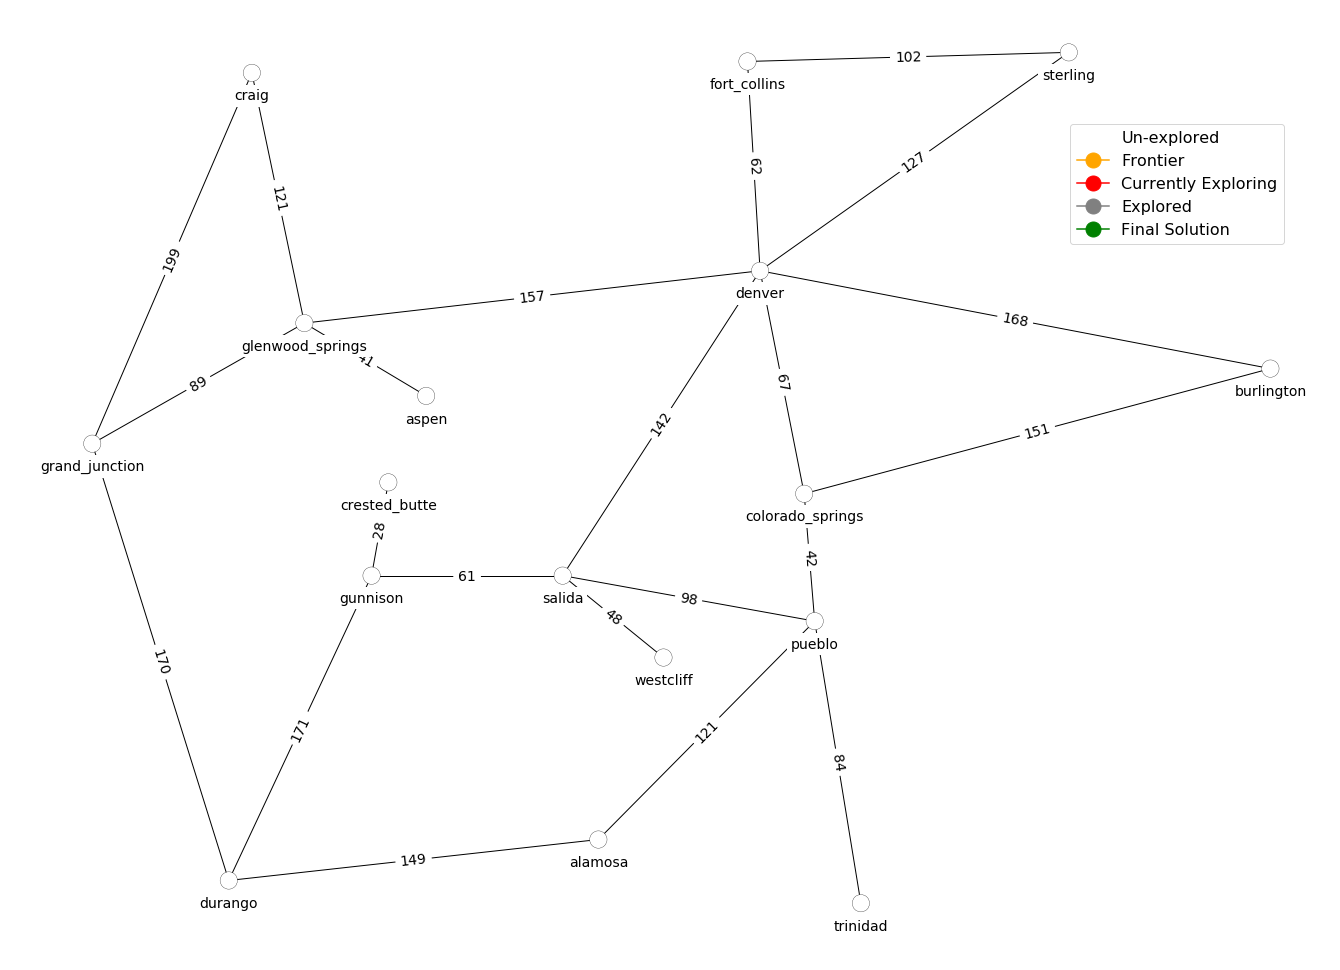

In [41]:
show_map(colorado_graph_data)

## Assignment

Submit your work as a Jupyter notebook saved as a PDF.

1. Base Assignment (100 points)
   * Compare breadth-first graph and breadth-first tree search.  What is the fundamental algorithmic difference between the two. and don't worry about trivial differences like node colorings?  
     - Explain why this difference in needed.  
     - How is this difference expressed in code expressed in code?  
     - Hint:  The shorter your answer the better but no shorter.

   * Run the following algorithms using the simplified graph of Colorado roads and show the resulting solution as an undirected graph. 
     - Breadth First Search
     - Depth First Search 
     - Uniform Cost
     - Greedy
     - A*

1. Bonus Item (6 points)
   * Measure the efficiency of the algorithms you evaluated, describe how you gathered the data and create a markdown table of your results.  
   * Use what the search code is already returning to you and try to write as little code as possible.  
   * Include the number of iterations and the number of nodes included in the solution. 
